In [50]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import pairwise

In [51]:
tiny_network = [
    [0,1,1,1,1,1,1],
    [1,0,0,0,1,0,0],
    [1,0,0,0,1,0,0],
    [1,0,0,0,1,1,0],
    [1,1,1,1,0,0,0],
    [1,0,0,1,0,0,0],
    [1,0,0,0,0,0,0],
]
tiny_network = nx.from_numpy_array(np.array(tiny_network))

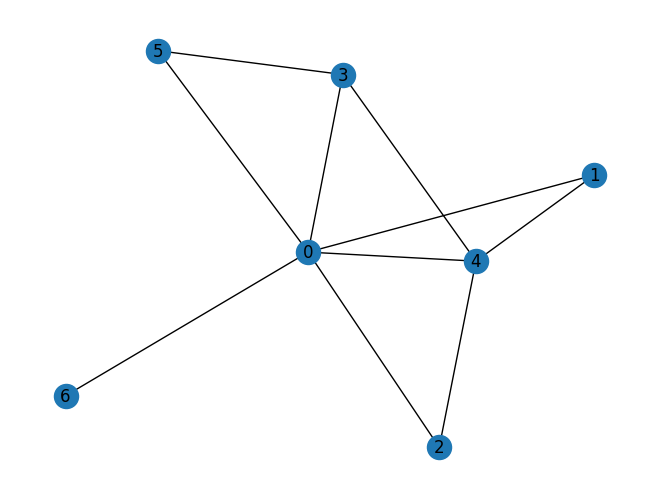

In [52]:
nx.draw(tiny_network, pos=nx.spring_layout(tiny_network, iterations=100, seed=1721), font_weight='light', with_labels=True)


In [53]:
def distance(graph, i, j):
    p = graph.get_edge_data(i, j, default={'weight': 0})["weight"] / graph.degree(i)
    dist = 1 - np.log2(p)
    return dist

def effective_distance(graph, i, j):
    # i to j
    paths = nx.all_simple_paths(graph, i, j)

    min_dist = 1000000000000
    
    for path in paths:
        # path = nx.shortest_path(graph, i, j)
        pairs = pairwise(path)
        acc = 0
        
        for i, j in pairs:
            acc += distance(graph, i, j)

        min_dist = min(min_dist, acc)
    
    return min_dist

In [54]:
def w_interaction(graph: nx.Graph, i: int, j: int):
    return (graph.degree(i) * graph.degree(j)) / np.square(effective_distance(graph, i, j))

In [55]:
def c_effg(graph, i):
    acc = 0
    
    for j in graph.nodes():
        if j != i:
            acc += w_interaction(graph, i, j)

    return acc

In [56]:
for i in tiny_network.nodes():
    print(c_effg(tiny_network, i))

6.535970021996451
5.592358210170172
5.592358210170172
5.8511062203672415
6.126502630901927
5.201152874410366
6.6184032683726315
